# Классификация при помощи ДПР

# Описание набора данных

В этой лабораторной работе мы рассмотрим разные подходы к задаче классификации, в частности, деревья принятия решений, а также поговорим о том, как бороться с несбалансированностью датасета.

Изучаемый нами набор данных — это набор данных о принятых предложениях по кредитам в банке **Thera-Bank**. Основные клиенты банка пользуются банком для того, чтобы разместить в нем свои денежные средства, то есть являются вкладчиками. В то же время, большую прибыль банку приносят кредиторы — люди, берущие в банке кредит. Поэтому банк хочет сформировать для своих вкладчиков выгодные предложения по кредиту. Кампания, проведенная банком для вкладчиков в прошлом году, показала, что коэффициент конверсии составил более 9,6%. Это побудило отдел маркетинга разработать кампании с улучшенным целевым маркетингом, чтобы увеличить вероятность успеха при, естественно, минимальном бюджете. Департамент хотел бы разработать классификатор, который поможет им определить потенциальных клиентов, которые с большей вероятностью приобретут кредит. Это повысит вероятность успеха при одновременном снижении стоимости кампании.

Набор данных содержит как информацию о клиенте, так и информацию о его реакции на кампанию предыдущего года:

*   **ID**: ID клиента

*   **Age**: Возраст (полных лет)

*   **Experience**: Стаж

*   **Income**: Годовой доход (в тысячах)

*   **ZIP Code**: Индекс места проживания

*   **Family**: Количество членов семьи

*   **CCAvg**: Средние траты в месяц по кредитной карте (в тысячах)

*   **Education**: Уровень образования (1: бакалавр, 2: магистр, 3: что-то большее)

*   **Mortgage**: Стоимость ипотеки, если имеется (в тысячах)

*   **Securities Account**: Наличие счета в ценных бумагах

*   **CD Account**: Наличие сертификата на депозит

*   **Online**: Использует ли клиент интернет-банкинг

*   **CreditCard**: Использует ли клиент кредитную карту, выпущенную данным банком

*   **Personal Loan**: Принял ли клиент персональное предложение по кредиту (целевая переменная)

# Разведочный анализ данных

Считайте набор данных в датафрейм

In [2]:
# < ENTER YOUR CODE HERE > 
import pandas as pd    
df = pd.read_csv('Bank_Personal_Loan_Modelling_train.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,409,60,36,89,91745,2,2.8,1,0,0,0,0,1,0
1,3738,44,19,30,91423,1,0.5,3,0,0,0,0,1,0
2,3890,26,0,19,93014,1,0.1,2,121,0,0,0,1,0
3,569,34,9,41,92101,2,0.1,1,161,0,0,0,1,1
4,1042,56,32,51,92780,4,1.5,1,0,0,0,0,0,0


При помощи метода <code>.describe()</code> изучите набор данных «с высоты птичьего полета».

In [3]:
# < ENTER YOUR CODE HERE > 
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2497.682500,45.429500,20.196250,73.479750,93156.583750,2.381750,1.921805,1.881500,55.968250,0.096000,0.104000,0.061500,0.599000,0.29050
std,1449.723807,11.489235,11.500143,46.321345,2197.762636,1.149716,1.738974,0.842102,101.054887,0.294628,0.305299,0.240275,0.490162,0.45405
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1245.750000,35.000000,10.000000,38.000000,91941.750000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2492.500000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,3767.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Набор данных содержит 14 переменных, 1 из которых является целевой.

1 номинальная переменная: **ID**

5 числовых переменных: **Age**, **Experience**, **Income**, **CCAvg**, **Mortgage**

3 категориальные переменных: **Family**, **Education**, **ZIP Code**

5 булевых переменных: **Personal Loan**, **Securities Account**, **CD Account**, **Online**, **CreditCard**

Пропущенных значений нет.

Experience содержит какие-то отрицательные значения

Удалите колонку ID, она нам не понадобится

In [4]:
# < ENTER YOUR CODE HERE > 
del df['ID']

Имеет смысл попробовать отловить каике-либо зависимости или их отсутствие.

Постройте матрицу корреляций

<Axes: >

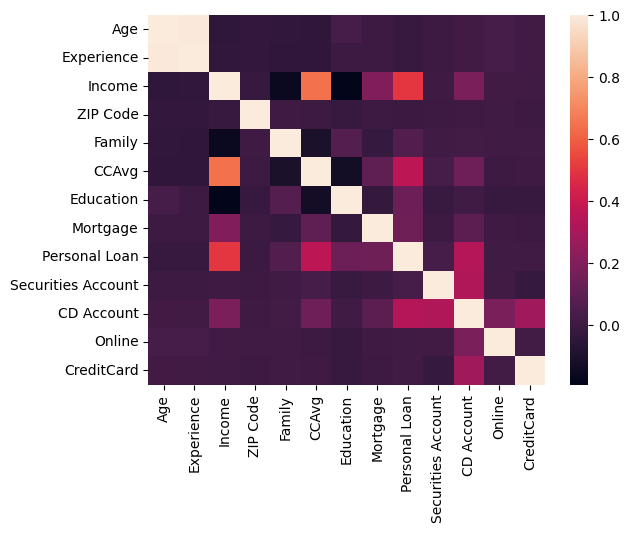

In [5]:
# < ENTER YOUR CODE HERE > 
import seaborn as sns
sns.heatmap(df.corr())

Определите две наиболее коррелированных переменных

In [53]:
# < ENTER YOUR CODE HERE > 

Определите признак, который меньше всего коррелирует (можно считать почти не коррелирует) с остальными признаками (в том числе с откликом). Удалите этот признак из рассмотрения.

Введите название удаленного признака.

In [6]:
# < ENTER YOUR CODE HERE > 
del df['ZIP Code']

# Предварительная подготовка данных

## Модификация признаков

Стоит разобраться с полем <code>Experience</code>. Видно, что опыт коррелирует с возрастом. Однако, в поле <code>Experience</code> присутствуют отрицательные значения. Имеет смысл "сдвинуть" значения в этой колонке. Добавьте ко всем значениям колонки <code>Experience</code> одно число так, чтобы минимальное значение было равно $0$.

Вычислите выборочное среднее колонки <code>Experience</code> после преобразования.

In [7]:
# < ENTER YOUR CODE HERE > 
def plus_three(s):
    return s+3

df['Experience'] = df['Experience'].apply(plus_three)

df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,45.429500,23.196250,73.479750,2.381750,1.921805,1.881500,55.968250,0.096000,0.104000,0.061500,0.599000,0.29050
std,11.489235,11.500143,46.321345,1.149716,1.738974,0.842102,101.054887,0.294628,0.305299,0.240275,0.490162,0.45405
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,35.000000,13.000000,38.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,45.000000,23.000000,63.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,55.000000,33.000000,98.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,67.000000,46.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Аналогично имеет смысл модфицировать поле <code>CCAvg</code>. Раз рассматривается годовой доход, то имеет смысл и значения трат рассматривать в рамках года.

Вычислите выборочное среднее колонки <code>CCAvg</code> после преобразования.

In [8]:
# < ENTER YOUR CODE HERE > 
def mult_twelve(s):
    return s*12

df['CCAvg'] = df['CCAvg'].apply(mult_twelve)

df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,45.429500,23.196250,73.479750,2.381750,23.061660,1.881500,55.968250,0.096000,0.104000,0.061500,0.599000,0.29050
std,11.489235,11.500143,46.321345,1.149716,20.867685,0.842102,101.054887,0.294628,0.305299,0.240275,0.490162,0.45405
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,35.000000,13.000000,38.000000,1.000000,8.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,45.000000,23.000000,63.000000,2.000000,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,55.000000,33.000000,98.000000,3.000000,30.000000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,67.000000,46.000000,224.000000,4.000000,120.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Определение выбросов

Постройте ящики с усами для всех предикторов. Рекомендуем использовать <code>sns.boxplot()</code>. Определите признак по изображению boxplot из вашего варианта.

<Axes: xlabel='Mortgage'>

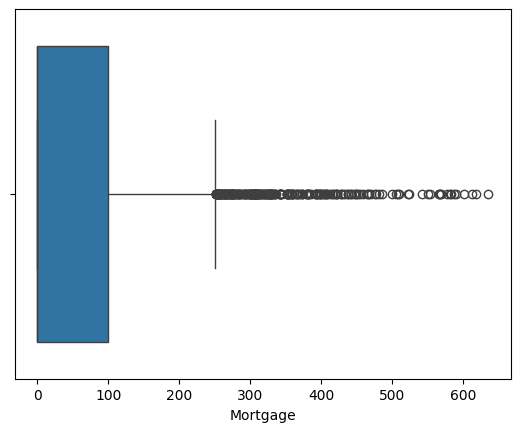

In [9]:
# < ENTER YOUR CODE HERE > 

sns.boxplot(x=df['Mortgage'])

# sns.boxplot(data=df)

Определите признак, содержащий наибольшее число выбросов. Введите название этого признака.


In [ ]:
# < ENTER YOUR CODE HERE > 
# смотри выше

Имеет смысл поработать с этим признаком, а для этого стоит руководствоваться следующими статистическими соображениями. Если вычесть из данных выборочное среднее, а после поделить на среднеквадратическое отклонение, то, пользуясь правилом 3-$\sigma$ для нормального распределения, можно выбросить слишком далекие от нуля хвосты. Постройте гистограмму распределения значений в рамках этого признака.

<Axes: xlabel='Mortgage', ylabel='Count'>

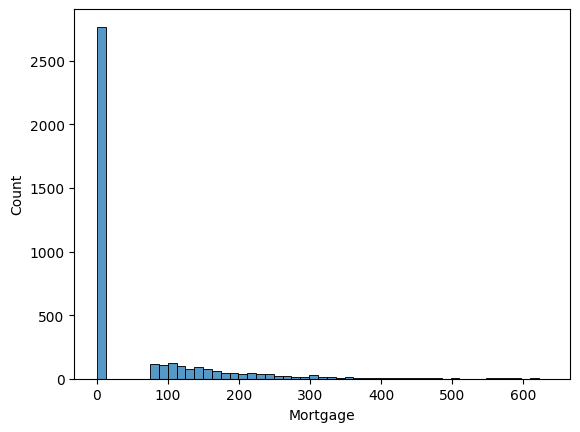

In [10]:
# < ENTER YOUR CODE HERE > 
sns.histplot(x=df['Mortgage'])

Очевидно в рамках этого признака есть небольшое количество значений, которые лежат далеко. Можно использовать <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html"><code>z-score</code></a> функцию из библиотеки <code>scipy</code>. 

Вспомнив курс теории вероятностей, становится понятно, что около $99.7\%$ нормального распределения сождержатся в отрезке $[-3\sigma, 3\sigma]$. Определите число элементов, модуль <code>z-score</code> которых больше, чем $3$. 

In [11]:
# < ENTER YOUR CODE HERE > 
from scipy import stats
import numpy as np

z_scores = stats.zscore(df['Mortgage'])
count = len(z_scores[np.abs(z_scores) > 3])
print("Число элементов, модуль z-score которых больше 3:", count)

Число элементов, модуль z-score которых больше 3: 83


Итак, выбросов не очень множко, поэтому выбросите их из набора данных. Введите оставшееся в датасете число строк.

In [12]:
# < ENTER YOUR CODE HERE > 
from scipy.stats import zscore

df['z_score'] = np.abs(zscore(df['Mortgage']))
outliers = df[np.abs(df['z_score']) > 3]
cleaned_df = df[np.abs(df['z_score']) <= 3]
del df['z_score']

print("Число элементов с модулем z-score > 3:", len(outliers))
print("Новый DataFrame без выбросов:")
del cleaned_df['z_score']
print(cleaned_df)

Число элементов с модулем z-score > 3: 83
Новый DataFrame без выбросов:
      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      60          39      89       2   33.6          1         0   
1      44          22      30       1    6.0          3         0   
2      26           3      19       1    1.2          2       121   
3      34          12      41       2    1.2          1       161   
4      56          35      51       4   18.0          1         0   
...   ...         ...     ...     ...    ...        ...       ...   
3995   37          14      59       4    2.4          3         0   
3996   36          13      91       1   18.0          3       289   
3997   57          34     131       2   32.4          1         0   
3998   40          18      83       1   12.0          3         0   
3999   30           8      23       2   10.8          3         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0      

# Построение моделей

# Базовый алгоритм

При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [13]:
from sklearn.model_selection import train_test_split

# Разбиение данных на обучающую и тестовую выборки с учетом стратификации по колонке Personal Loan
X_train, X_test, y_train, y_test = train_test_split(cleaned_df.drop('Personal Loan', axis=1), cleaned_df['Personal Loan'], test_size=0.2, random_state=7, stratify=cleaned_df['Personal Loan'])

Обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Обучение модели DecisionTreeClassifier на тренировочном наборе данных
clf = DecisionTreeClassifier(random_state=7, criterion='entropy')
clf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = clf.predict(X_test)

# Вычисление f1_score модели на тестовых данных
f1 = f1_score(y_pred, y_test)

print('f1_score модели на тестовых данных:', f1)

f1_score модели на тестовых данных: 0.8840579710144928


## Учет дисбаланса соотношения классов

А теперь, если вспомнить, что выборка несбалансирована, то можно указать дополнительный параметр <code>class_weight</code>. Обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Обучение модели DecisionTreeClassifier на тренировочном наборе данных
clf = DecisionTreeClassifier(random_state=7, criterion='entropy', class_weight='balanced')
clf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = clf.predict(X_test)

# Вычисление f1_score модели на тестовых данных
f1 = f1_score(y_pred, y_test)

print('f1_score модели на тестовых данных:', f1)

f1_score модели на тестовых данных: 0.8652482269503546


## Upsampling обучающей выборки

Помимо очевидного присвоения весов несбалансированным классам, можно воспользоваться алгоритмом <code>SMOTE</code>. Ему на вход подаются экземпляры всех классов с их метками, а он в свою очередь пытается на их основе экстраполировать само распределение данных этого класса. После этого он сэмплирует новые объекты классов так, пока количество строк каждого класса не станет везде одинаковым.

Получается, что в таком случае будет получена сбалансированная выборка, и пропадет нужда как-то ухищряться с весами и прочим. 

Определите долю элементов класса $0$ тренировочного набора данных.

In [19]:
# Определение доли элементов класса 0 в тренировочном наборе данных

class_0_count = y_train[y_train == 0].shape[0]
print(class_0_count)
total_count = y_train.shape[0]
print(total_count)
class_0_ratio = class_0_count / total_count
print(class_0_ratio)

y_train.value_counts()



2855
3133
0.9112671560804341


Personal Loan
0    2855
1     278
Name: count, dtype: int64

Используя класс <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html"><code>SMOTE</code></a> из модуля <code>imblearn.over_sampling</code> сбалансируйте обучающую выборку с параметрами, указанными в вашем варианте.

In [20]:
# < ENTER YOUR CODE HERE > 
from imblearn.over_sampling import SMOTE

# Создание экземпляра SMOTE с параметром random_state=7
smote = SMOTE(random_state=7)

# Балансировка обучающей выборки
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

y_resampled.value_counts()


Personal Loan
0    2855
1    2855
Name: count, dtype: int64

Убедитесь, что теперь в выборке содержится одинаковое число представителей обоих классов. Введите количество объектов класса $1$.

In [ ]:
# < ENTER YOUR CODE HERE > 

Снова обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [21]:
# Обучение модели DecisionTreeClassifier на тренировочном наборе данных
clf = DecisionTreeClassifier(random_state=7, criterion='entropy')
clf.fit(X_resampled, y_resampled)

# Предсказание на тестовых данных
y_pred = clf.predict(X_test)    

# Вычисление f1_score модели на тестовых данных
f1 = f1_score(y_test, y_pred)

print('f1_score модели на тестовых данных:', f1)

f1_score модели на тестовых данных: 0.8129032258064516
